# Entregável 1

## Análise e Limpeza de dados

In [388]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [389]:
df = pd.read_csv('dataset1.csv') #dataframe: leitura do dataset

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   data         2880 non-null   object 
 1   responsável  2880 non-null   object 
 2   temperatura  2799 non-null   float64
dtypes: float64(1), object(2)
memory usage: 67.6+ KB


É possível observar o dataset consiste de três variáveis: data(categórica), responsável(categórica) e temperatura(float)

In [391]:
df.head(10)

,data,responsável,temperatura
0,sábado - 01/04/2023 00:00,Fábio,19.59
1,sábado - 01/04/2023 00:15,Fábio,19.10
2,sábado - 01/04/2023 00:30,Fábio,19.14
3,sábado - 01/04/2023 00:45,Fábio,18.55
4,sábado - 01/04/2023 01:00,Fábio,NaN
5,sábado - 01/04/2023 01:15,Fábio,18.19
6,sábado - 01/04/2023 01:30,Fábio,18.17
7,sábado - 01/04/2023 01:45,Fábio,17.79
8,sábado - 01/04/2023 02:00,Fábio,17.86
9,sábado - 01/04/2023 02:15,Fábio,17.49


Já é possível visualizar que alguns dados estão com valores faltando.  

### Lidando com dados categóricos

In [392]:
df.describe(include=['object'])

,data,responsável
count,2880,2880
unique,2880,6
top,sábado - 01/04/2023 00:00,Fábio
freq,1,624


A coluna dos 'responsáveis' está correta.

A coluna da data está em um formato pouco usual, para isso, será necessário converter para um formato no qual seja possível trabalharmos: datatime.

In [393]:
df['datetime'] = df['data'].str[-16:]
df['dia das semanas'] = df['data'].str[:3]

In [394]:
df.head(10)

,data,responsável,temperatura,datetime,dia das semanas
0,sábado - 01/04/2023 00:00,Fábio,19.59,01/04/2023 00:00,sáb
1,sábado - 01/04/2023 00:15,Fábio,19.10,01/04/2023 00:15,sáb
2,sábado - 01/04/2023 00:30,Fábio,19.14,01/04/2023 00:30,sáb
3,sábado - 01/04/2023 00:45,Fábio,18.55,01/04/2023 00:45,sáb
4,sábado - 01/04/2023 01:00,Fábio,NaN,01/04/2023 01:00,sáb
5,sábado - 01/04/2023 01:15,Fábio,18.19,01/04/2023 01:15,sáb
6,sábado - 01/04/2023 01:30,Fábio,18.17,01/04/2023 01:30,sáb
7,sábado - 01/04/2023 01:45,Fábio,17.79,01/04/2023 01:45,sáb
8,sábado - 01/04/2023 02:00,Fábio,17.86,01/04/2023 02:00,sáb
9,sábado - 01/04/2023 02:15,Fábio,17.49,01/04/2023 02:15,sáb


Já com uma primeira vista do dataset, é possível observar que há dados faltando.


### Limpeza de Dados

Uma maneira de lidarmos com os dados faltantes é por meio de imputação de média.[1]

In [395]:
df['temperatura'].fillna((df['temperatura'].mean()), inplace = True)

In [396]:
df.head(10)

,data,responsável,temperatura,datetime,dia das semanas
0,sábado - 01/04/2023 00:00,Fábio,19.590000,01/04/2023 00:00,sáb
1,sábado - 01/04/2023 00:15,Fábio,19.100000,01/04/2023 00:15,sáb
2,sábado - 01/04/2023 00:30,Fábio,19.140000,01/04/2023 00:30,sáb
3,sábado - 01/04/2023 00:45,Fábio,18.550000,01/04/2023 00:45,sáb
4,sábado - 01/04/2023 01:00,Fábio,23.206384,01/04/2023 01:00,sáb
5,sábado - 01/04/2023 01:15,Fábio,18.190000,01/04/2023 01:15,sáb
6,sábado - 01/04/2023 01:30,Fábio,18.170000,01/04/2023 01:30,sáb
7,sábado - 01/04/2023 01:45,Fábio,17.790000,01/04/2023 01:45,sáb
8,sábado - 01/04/2023 02:00,Fábio,17.860000,01/04/2023 02:00,sáb
9,sábado - 01/04/2023 02:15,Fábio,17.490000,01/04/2023 02:15,sáb


In [397]:
df['data'] = pd.to_datetime(df['datetime'])
df = df.drop('datetime', axis=1)

In [398]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data             2880 non-null   datetime64[ns]
 1   responsável      2880 non-null   object        
 2   temperatura      2880 non-null   float64       
 3   dia das semanas  2880 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 90.1+ KB


In [399]:
df.head()

,data,responsável,temperatura,dia das semanas
0,2023-01-04 00:00:00,Fábio,19.590000,sáb
1,2023-01-04 00:15:00,Fábio,19.100000,sáb
2,2023-01-04 00:30:00,Fábio,19.140000,sáb
3,2023-01-04 00:45:00,Fábio,18.550000,sáb
4,2023-01-04 01:00:00,Fábio,23.206384,sáb


Podemos ver que a data foi convertida pro formato datetime. Também foi necessário armazenar as variáveis de dias da semana numa coluna a mais.

### Gráfico da temperatura em função do tempo

In [400]:
df['data'] = df['data'].dt.strftime("%d/%m/%Y, %H:%M:%S")

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   data             2880 non-null   object 
 1   responsável      2880 non-null   object 
 2   temperatura      2880 non-null   float64
 3   dia das semanas  2880 non-null   object 
dtypes: float64(1), object(3)
memory usage: 90.1+ KB


In [402]:
timeseries = np.array(df['data'])
temp = np.array(df['temperatura'])
print(timeseries)
print(temp)

['04/01/2023, 00:00:00' '04/01/2023, 00:15:00' '04/01/2023, 00:30:00' ...
 '30/04/2023, 23:15:00' '30/04/2023, 23:30:00' '30/04/2023, 23:45:00']
[19.59 19.1  19.14 ... 19.43 19.25 19.24]


<AxesSubplot:>

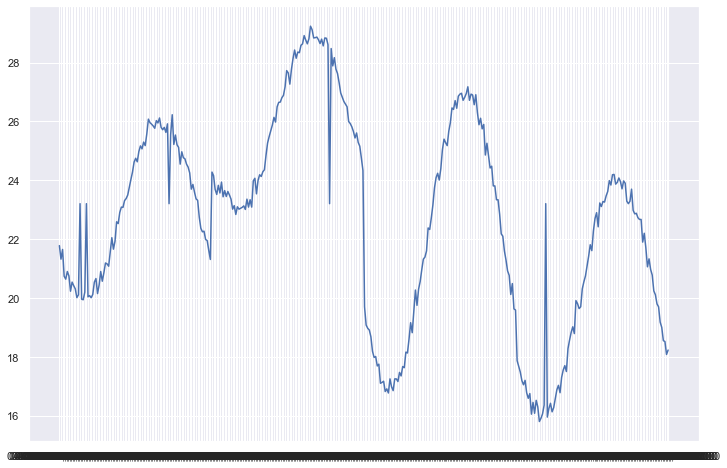

In [588]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,8))
sns.lineplot(x = timeseries, y = temp)

De acordo com o gráfico, as temperaturas ao longo do mês Abril apresentam uma alta oscilação, com a temperatura máxima e mínima variando ao longo do mês, mas dentro de um limite. O gráfico representa a variação de temperatura na primavera.

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   data             2880 non-null   object 
 1   responsável      2880 non-null   object 
 2   temperatura      2880 non-null   float64
 3   dia das semanas  2880 non-null   object 
dtypes: float64(1), object(3)
memory usage: 90.1+ KB


## Gráfico por assistente

Vamos analisar as amostra de cada assistente do grupo.


In [405]:
df['responsável'].unique()

array(['Fábio', 'Fernando', 'Júlia', 'Letícia', 'Marcela', 'Rafael'],
      dtype=object)

In [406]:
type(df['data'])

pandas.core.series.Series

### Responsável: Fábio

In [407]:
resp= df[df['responsável'] == 'Fábio']

In [408]:
timeseries = np.array(resp['data'])
temp = np.array(resp_fabio['temperatura'])

<AxesSubplot:>

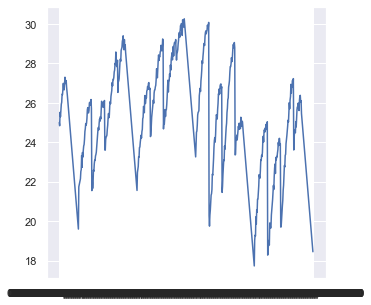

In [409]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(5,5))
sns.lineplot(x = timeseries, y = temp)

### Responsável: Fernando

<AxesSubplot:>

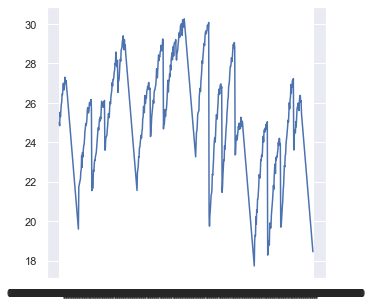

In [410]:
resp = df[df['responsável'] == 'Fernando']
timeseries = np.array(resp['data'])
temp = np.array(resp['temperatura'])
sns.set_theme(style="darkgrid")
plt.figure(figsize=(5,5))
sns.lineplot(x = timeseries, y = temp)


### Júlia

<AxesSubplot:>

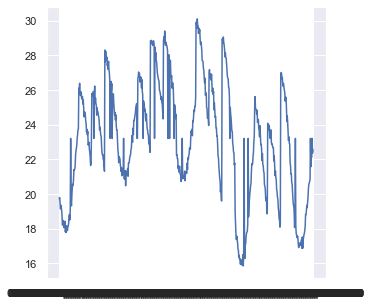

In [411]:
resp = df[df['responsável'] == 'Júlia']
timeseries = np.array(resp['data'])
temp = np.array(resp['temperatura'])
sns.set_theme(style="darkgrid")
plt.figure(figsize=(5,5))
sns.lineplot(x = timeseries, y = temp)

### Letíca

<AxesSubplot:>

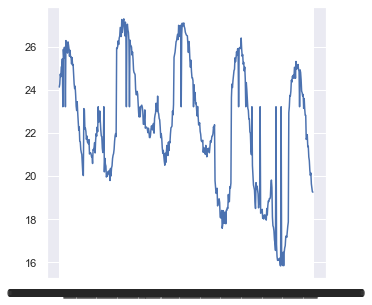

In [412]:
resp = df[df['responsável'] == 'Letícia']
timeseries = np.array(resp['data'])
temp = np.array(resp['temperatura'])
sns.set_theme(style="darkgrid")
plt.figure(figsize=(5,5))
sns.lineplot(x = timeseries, y = temp)

### Marcela

<AxesSubplot:>

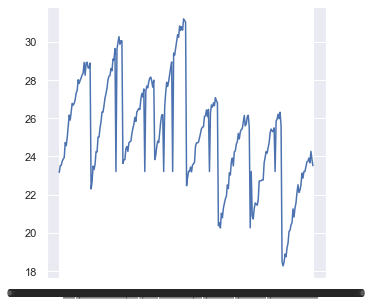

In [413]:
resp = df[df['responsável'] == 'Marcela']
timeseries = np.array(resp['data'])
temp = np.array(resp['temperatura'])
sns.set_theme(style="darkgrid")
plt.figure(figsize=(5,5))
sns.lineplot(x = timeseries, y = temp)

### Rafael

<AxesSubplot:>

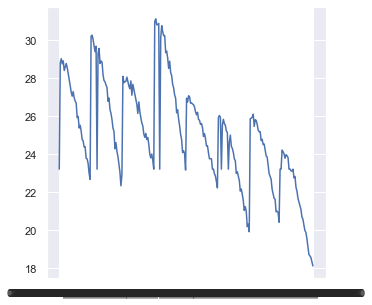

In [414]:
resp = df[df['responsável'] == 'Rafael']
timeseries = np.array(resp['data'])
temp = np.array(resp['temperatura'])
sns.set_theme(style="darkgrid")
plt.figure(figsize=(5,5))
sns.lineplot(x = timeseries, y = temp)

***Analisando os gráficos acima, é possível observar que o gráfico apresentado pela Letíca possui uma discrepância de valores máximos e mínimos em relação aos outros gráficos. Enquanto a maioria dos gráficos possuem valores máximos e mínimos em 30 e 18, respectivamente, o dela possui entre 26 e 16.

## Quarta-feira mais fria do mês

In [415]:
quarta = df[df['dia das semanas'] == 'qua']

In [416]:
quarta.loc[quarta['temperatura'].idxmin()]

data               26/04/2023, 03:30:00
responsável                       Fábio
temperatura                        15.8
dia das semanas                     qua
Name: 2414, dtype: object

<AxesSubplot:>

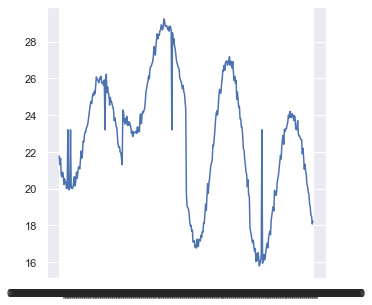

In [417]:
timeseries = np.array(quarta['data'])
temp = np.array(quarta['temperatura'])
sns.set_theme(style="darkgrid")
plt.figure(figsize=(5,5))
sns.lineplot(x = timeseries, y = temp)

### Temperaturas máximas e mínimas ao longo do mês

In [560]:
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y, %H:%M:%S')

In [566]:
dias = np.arange(0,30,1)
tf = pd.DataFrame({'Dias': dias})

In [567]:
max_df  = df.loc[df.groupby(df['data'].dt.normalize())['temperatura'].idxmax().values]
min_df  = df.loc[df.groupby(df['data'].dt.normalize())['temperatura'].idxmin().values]
maxs = np.array(max_df['temperatura'])
mins = np.array(min_df['temperatura'])

In [568]:
tf['T.max'] = maxs
tf['T.min'] = mins

In [569]:
tf.head(30)

,Dias,T.max,T.min
0,0,27.30,16.91
1,1,26.28,17.77
2,2,26.39,19.81
3,3,29.02,20.57
4,4,31.20,20.49
5,5,29.41,22.80
6,6,30.26,21.76
7,7,27.10,20.72
8,8,30.11,21.69
9,9,27.07,20.88


In [ ]:
sns.set_theme(style="darkgrid")

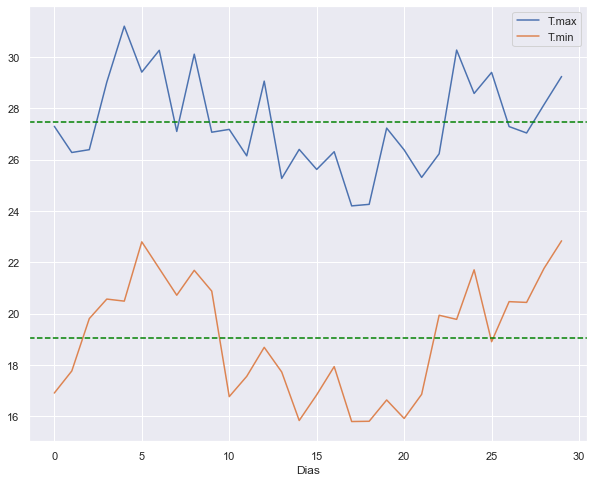

In [587]:
tf.plot(x = "Dias", y = ["T.max","T.min"], figsize=(10, 8))
tmax_mean = tf['T.max'].mean()
tmin_mean = tf['T.min'].mean()
plt.axhline(y = tmax_mean, color ="green", linestyle ="--")
plt.axhline(y = tmin_mean, color ="green", linestyle ="--")